In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
from datetime import datetime, time
from datetime import datetime
import warnings
warnings.filterwarnings ('ignore')

In [7]:
CocaCola_Sales=pd.read_csv("D:/Data Secience/Assignment/Forecasting/CocaCola_Sales_Rawdata.csv",header=0, index_col='Quarter', parse_dates=True)#,squeeze=True)
#CocaCola_Sales.index.freq='Q'
CocaCola_Sales.head()


,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


 ## Exploratory Data Analyst

In [8]:
cc_df=CocaCola_Sales.copy()
cc_df.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


 ## Setting a DatetimeIndex Frequency

In [9]:
cc_df.index.freq = 'QS'
cc_df.index

DatetimeIndex(['1986-01-01', '1986-04-01', '1986-07-01', '1986-10-01',
               '1987-01-01', '1987-04-01', '1987-07-01', '1987-10-01',
               '1988-01-01', '1988-04-01', '1988-07-01', '1988-10-01',
               '1989-01-01', '1989-04-01', '1989-07-01', '1989-10-01',
               '1990-01-01', '1990-04-01', '1990-07-01', '1990-10-01',
               '1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01', '1993-07-01', '1993-10-01',
               '1994-01-01', '1994-04-01', '1994-07-01', '1994-10-01',
               '1995-01-01', '1995-04-01', '1995-07-01', '1995-10-01',
               '1996-01-01', '1996-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-JAN')

In [10]:
# Data Structure
cc_df.shape

(42, 1)

In [11]:
#Duplicate
cc_df[cc_df.duplicated()].shape

(0, 1)

In [12]:
cc_df.dtypes

Sales    float64
dtype: object

In [13]:
# Missing values
cc_df.isna().sum()

Sales    0
dtype: int64

In [14]:
# Descriptive statostics
cc_df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714246
50%,2782.376999
75%,3609.250000
max,5253.000000


 ## Visualization

<AxesSubplot:xlabel='quarter', ylabel='year'>

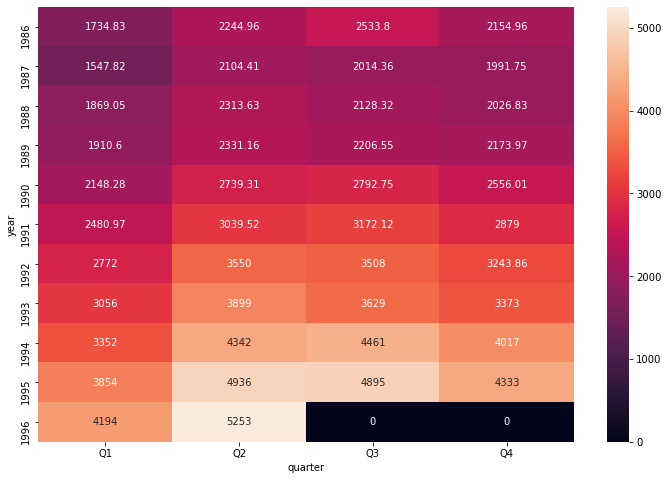

In [205]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month=pd.pivot_table(data=cc_sales, values="Sales", index='year',columns="quarter", aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month, annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Sales'>

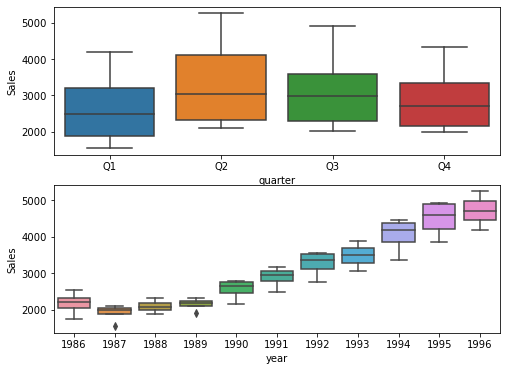

In [206]:
# Box Plot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter", y="Sales", data=cc_sales)
plt.subplot(212)
sns.boxplot(x="year", y="Sales", data=cc_sales)


<AxesSubplot:xlabel='year', ylabel='Sales'>

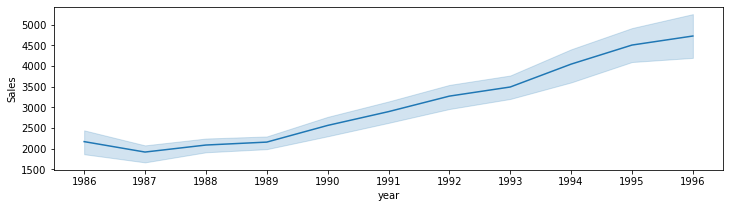

In [207]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year", y="Sales", data=cc_sales)

 ## Outlier detection
    
    
 ### Box plot and interquartile range

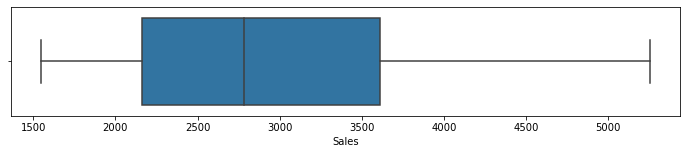

In [208]:

fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(cc_sales['Sales'], whis=1.5)

whis=1.5
1st quartile = 2200

3rd quartile = 3600

Quartile range = (3rd quartile - 1st quartile) = 3600-2200 = 1400

Whisker on the upper side

3rd quartile + (Quartile range whis) = 3600 + (1400 *1.5) = 3600 + 2100 = 5700

There is no outliers above the whisker 5800.

Whisker on th lower side

1st quartile - (Quartile range whis) = 2200 - (1400*1.5) = 2200-2100=100

There is no outliers on the negative side of the lower whisker.

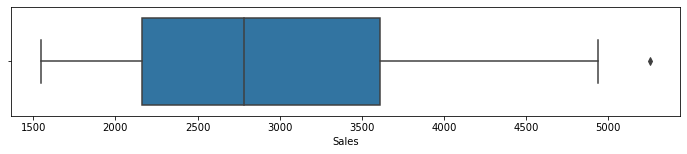

In [209]:

fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(cc_sales['Sales'], whis=1)

whis=1
1st quartile = 2200

3rd quartile = 3600

Quartile range = (3rd quartile - 1st quartile) = 3600-2200 = 1400

Whisker on the upper side

3rd quartile + (Quartile range whis) = 3600 + (1400 *1) = 3600 + 1400 = 5000

There are 1 outliers above the whisker 5000.

 ### Conclusion for selecting whis = 1.5
So from the above analysis of whis 1 and 1.5, we should select the whis=1.5 quartile range. Because we don't want to miss any of the data in this time series analysis..

 ## Run as ETS Decomposition

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

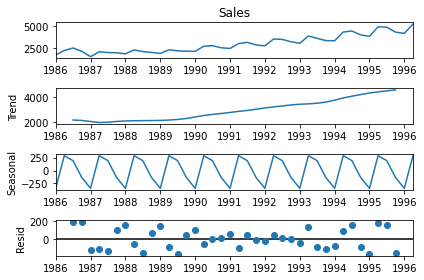

In [21]:
results=seasonal_decompose(cc_df['Sales'], model='addittive')
est_plot=results.plot()

 ## Transformation

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

<AxesSubplot:xlabel='Quarter'>

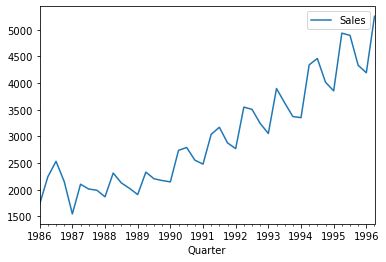

In [23]:
#Original data plot
cc_df.plot()

In [24]:
dataframe=pd.DataFrame(cc_df.values)
dataframe.columns=['Sales']
dataframe['Sales']=np.sqrt(dataframe['Sales'])

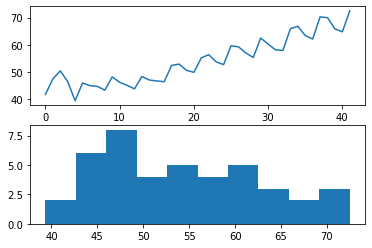

In [25]:
# Line Plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])

#Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])
pyplot.show()

 ## Log Transform

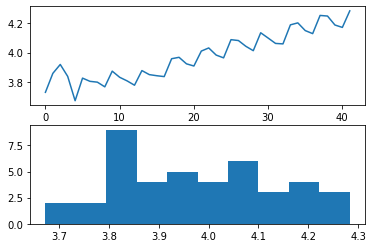

In [26]:
from numpy import log

dataframe=pd.DataFrame(cc_df.values)
dataframe.columns=['Sales']
dataframe['Sales']=log(dataframe['Sales'])

#line Plot
pyplot.subplot(211)
pyplot.plot(dataframe['Sales'])

#Histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Sales'])

pyplot.show()

 ## Creating Dummy Variables

In [27]:
dummy_df=pd.read_csv("D:/Data Secience/Assignment/Forecasting/CocaCola_Sales_Rawdata.csv")
dummy_df.head()

,Quarter,Sales
0,1986Q1,1734.827000
1,1986Q2,2244.960999
2,1986Q3,2533.804993
3,1986Q4,2154.962997
4,1987Q1,1547.818996


In [28]:

import numpy as np
Quarter=['Q1','Q2','Q3','Q4']

n=dummy_df['Quarter'][0]
n[4:]

dummy_df['quarter']=0

for i in range(42):
    n=dummy_df['Quarter'][i]
    dummy_df['quarter'][i]=n[4:]

dummy=pd.DataFrame(pd.get_dummies(dummy_df['quarter']))

cc=pd.concat((dummy_df, dummy), axis=1)

cc.head()


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,1986Q1,1734.827000,Q1,1,0,0,0
1,1986Q2,2244.960999,Q2,0,1,0,0
2,1986Q3,2533.804993,Q3,0,0,1,0
3,1986Q4,2154.962997,Q4,0,0,0,1
4,1987Q1,1547.818996,Q1,1,0,0,0


 ## Creating t, t_square and log values

In [29]:
t=np.arange(1,43)
cc['t']=t

cc['t_square']=cc['t']*cc['t']

log_Sales=np.log(cc['Sales'])
cc['log_Sales']=log_Sales

cc_sales=cc[['Quarter','Sales','t','t_square','log_Sales','Q1','Q2','Q3','Q4','quarter']]
cc_sales.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1


In [30]:
cc_sales["Date"]= pd.to_datetime(cc_sales.Quarter)

cc_sales["year"] = cc_sales.Date.dt.strftime("%Y") #Year extraction 

cc_sales.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter,Date,year
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1,1986-01-01,1986
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2,1986-04-01,1986
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3,1986-07-01,1986
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4,1986-10-01,1986
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1,1987-01-01,1987


 ## Time Series Decomposition

 ### Splitting Data

In [31]:
train=cc_sales.head(38)
test=cc_sales.tail(4)

 ## Linear Model

In [32]:
import statsmodels.formula.api as smf

In [33]:
linear_model=smf.ols('Sales~t', data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.5532957485534

 ## Exponential

In [34]:
Exp=smf.ols('log_Sales~t', data=train).fit()
pred_Exp =pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.2479731321014

 ## Quadratic

In [35]:
Quad=smf.ols('Sales~t+t_square', data=train).fit()
pred_Quad=pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183519820354

 ## Additive Seasonality

In [36]:
add_sea=smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154374429

 ## Additive and Quadratic

In [37]:
add_sea_Quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=train).fit()
pred_add_sea_Quad=pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_square']]))
rmse_add_sea_Quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_Quad))**2))
rmse_add_sea_Quad

301.73800721454336

 ## Multiplicative Seasonality

In [38]:
mul_sea=smf.ols('log_Sales~Q1+Q2+Q3', data=train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test))
rmse_mult_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mult_sea

1963.3896400563303

 ## Multiplicative Additive Seasonality

In [39]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

225.52439056159156

 ## Compare the Results

In [40]:
data={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_Quad","rmse_mult_sea","rmse_Mult_add_sea"]),"RMSE":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE"])

,MODEL,RMSE
6,rmse_Mult_add_sea,225.524391
4,rmse_add_sea_Quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_mult_sea,1963.389640


 ## Observation
 ###            I have crated 4 dummy variablesand as per above RMSE values, I have selected Multiplicative Additive Seasonality  model for my forecasting algorithm.  
    

 ## Predict for new time period

In [41]:
predict_data=cc_sales.copy()
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,quarter,Date,year
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,Q1,1986-01-01,1986
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,Q2,1986-04-01,1986
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,Q3,1986-07-01,1986
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,Q4,1986-10-01,1986
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,Q1,1987-01-01,1987


In [42]:
predict_data=predict_data.drop('quarter',axis=1)
predict_data=predict_data.drop('Date',axis=1)
predict_data=predict_data.drop('year',axis=1)

In [43]:
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0


 ## Build the model on entire dataset

In [44]:
model_full=smf.ols('log_Sales~t+Q1+Q2+Q3', data=cc_sales).fit()

In [45]:
pred_new=pd.Series(Mul_Add_sea.predict(predict_data))
predict_data['Forecared_Sales']=pd.Series(pred_new)
predict_data.head()

,Quarter,Sales,t,t_square,log_Sales,Q1,Q2,Q3,Q4,Forecared_Sales
0,1986Q1,1734.827000,1,1,7.458663,1,0,0,0,7.345823
1,1986Q2,2244.960999,2,4,7.716443,0,1,0,0,7.587884
2,1986Q3,2533.804993,3,9,7.837477,0,0,1,0,7.574280
3,1986Q4,2154.962997,4,16,7.675529,0,0,0,1,7.498859
4,1987Q1,1547.818996,5,25,7.344602,1,0,0,0,7.440236


 ## Naive Method(Forecasting last month data)

In [46]:
#naive=pd.DataFrame(cc_df.copy())

naive=CocaCola_Sales.copy()
naive.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


In [47]:
train_naive=naive.iloc[:38]
test_naive=naive.iloc[38:]

In [48]:
naive_train=np.asarray(train_naive.Sales)
lastvalue=naive_train[len(naive_train)-1]
y_hat=test_naive.copy()
y_hat['naive_forecast']=lastvalue

In [49]:
y_hat

,Sales,naive_forecast
Quarter,,
1995-07-01,4895.0,4936.0
1995-10-01,4333.0,4936.0
1996-01-01,4194.0,4936.0
1996-04-01,5253.0,4936.0


 ## Plot train and forecast dataset

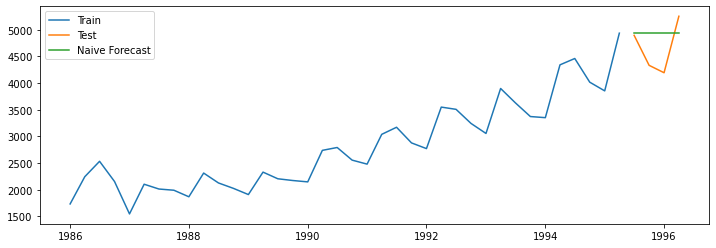

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train_naive['Sales'], label='Train')
plt.plot(test_naive['Sales'], label='Test')
plt.plot(y_hat['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

 ## Evaluate the Model

In [51]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt
import numpy as np

In [52]:
mse_naive=mean_squared_error(test_naive.Sales, y_hat.naive_forecast)
mse_naive

254085.75

In [53]:
rmse_naive=rmse(test_naive.Sales, y_hat.naive_forecast)
rmse_naive

504.0691916790789

In [54]:
Naive={"MODEL":pd.Series(['Naive Mehtod']), 'RMSE':pd.Series([rmse_naive]), "MSE":pd.Series([mse_naive])}
Naive=pd.DataFrame(Naive)
Naive

,MODEL,RMSE,MSE
0,Naive Mehtod,504.069192,254085.75


 ## Observation
 ### 1) All the values are same as we assigned all the forecast recodes to the last value of the tain set.
 ### 2) The Forecasting is undervalued when compared to the actual test data value.

 ## Moving Average

In [55]:
CC_MA=CocaCola_Sales.copy()
CC_MA.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


 ## Simple Moving Average

In [56]:
CC_MA['6-month-SMA']=CC_MA['Sales'].rolling(window=6).mean()
CC_MA['12-month-SMA']=CC_MA['Sales'].rolling(window=12).mean()

In [57]:
CC_MA.head(15)

,Sales,6-month-SMA,12-month-SMA
Quarter,,,
1986-01-01,1734.827000,NaN,NaN
1986-04-01,2244.960999,NaN,NaN
1986-07-01,2533.804993,NaN,NaN
1986-10-01,2154.962997,NaN,NaN
1987-01-01,1547.818996,NaN,NaN
1987-04-01,2104.411995,2053.464497,NaN
1987-07-01,2014.362999,2100.053830,NaN
1987-10-01,1991.746998,2057.851496,NaN
1988-01-01,1869.049999,1947.058997,NaN


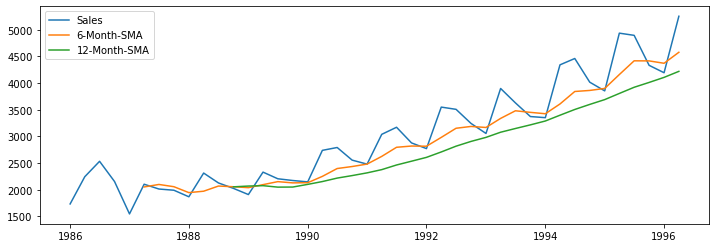

In [58]:
#CC_MA Plot

plt.figure(figsize=(12,4))
plt.plot(CC_MA['Sales'], label='Sales')
plt.plot(CC_MA['6-month-SMA'], label='6-Month-SMA')
plt.plot(CC_MA['12-month-SMA'], label='12-Month-SMA')
plt.legend(loc='best')
plt.show()

 ## Evaluate the Model

In [237]:
y_hat_ma=CC_MA.copy()

In [211]:
train_len=38

In [241]:
train_ma=CC_MA['Sales'].head(38)
test_ma=CC_MA['Sales'].tail(4)

In [242]:
# Moving average window. We will take the avg of last 12 months for forecasting the future
ma_window=12

In [243]:
# Rolling function calculated the last number of records
y_hat_sma['SMA_forecast'] = CC_MA['Sales'].rolling(ma_window).mean()

In [244]:
train_ma1=train_ma[len(train_ma)-1]

In [245]:
y_hat_sma.head()

,Sales,SMA_forecast
Quarter,,
1986-01-01,1734.827000,NaN
1986-04-01,2244.960999,NaN
1986-07-01,2533.804993,NaN
1986-10-01,2154.962997,NaN
1987-01-01,1547.818996,NaN


In [246]:
mse_sma=mean_squared_error(test_sma['Sales'], y_hat_sma['SMA_forecast'][train_len:])
mse_sma.round(2)

531355.3

In [247]:
rmse_sma=np.sqrt(mean_squared_error(test_sma['Sales'], y_hat_sma['SMA_forecast'][train_len:]))
rmse_sma.round(2)

728.94

In [248]:
Moving_Average={"MODEL":pd.Series(["Simple Moving Average Method"]), "RMSE":pd.Series([rmse_sma]), "MSE":pd.Series([mse_sma])}
Moving_Average=pd.DataFrame(Moving_Average)
Moving_Average

,MODEL,RMSE,MSE
0,Simple Moving Average Method,728.94122,531355.302332


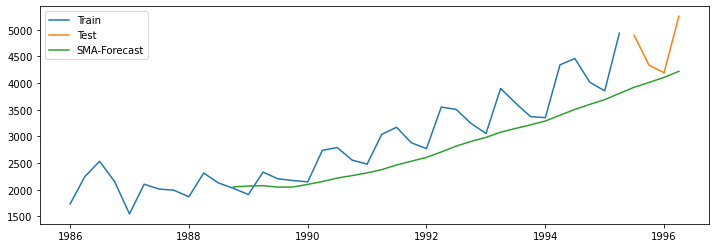

In [69]:
plt.figure(figsize=(12,4))
plt.plot(train_sma['Sales'], label="Train")
plt.plot(test_sma['Sales'], label="Test")
plt.plot(y_hat_sma['SMA_forecast'], label='SMA-Forecast')
plt.legend(loc='best')
plt.show()

 ## Exponentially Weighted Moving Average

In [249]:
EWMA=cc_df.copy()
EWMA.head()

,Sales
Quarter,
1986-01-01,3.729331
1986-04-01,3.858222
1986-07-01,3.918739
1986-10-01,3.837764
1987-01-01,3.672301


In [250]:
span=12
alpha =2/(span+1)

In [251]:
EWMA['EWMA12']=cc_df['Sales'].ewm(span=12, adjust=False).mean().dropna()

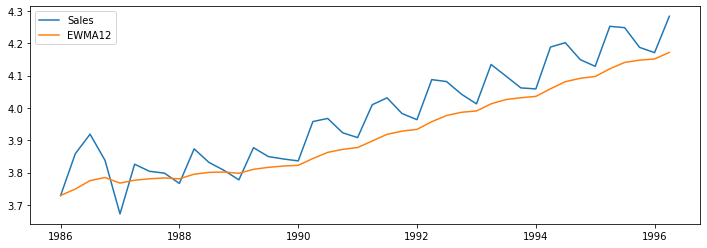

In [73]:
plt.figure(figsize=(12,4))
plt.plot(EWMA['Sales'],label='Sales')
plt.plot(EWMA['EWMA12'], label='EWMA12')
plt.legend(loc='best')
plt.show()

 ## Evaluate the Model

In [74]:
y_hat_ewma=CC_MA.copy()

In [75]:
train_ewma=CC_MA['Sales'].head(38)
test_ewma=CC_MA['Sales'].tail(4)

In [76]:
ewma=train_ewma[len(train_ewma)-1]

In [77]:
y_hat_ewma['EWMA_Forecast']=ewma
#y_hat_ewma['EWMA_Forecast'].dropna()

In [78]:
mse_ewma=mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:]).round(2)
mse_ewma

254085.75

In [79]:
rmse_ewma = np.sqrt(mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:])).round(2)
rmse_ewma

504.07

In [80]:
EWMA={"MODEL":pd.Series(["Exponentially Weighted Moving Average"]),"RMSE":pd.Series([rmse_ewma]),"MSE":pd.Series([mse_ewma])}
EWMA=pd.DataFrame(EWMA)
EWMA

,MODEL,RMSE,MSE
0,Exponentially Weighted Moving Average,504.07,254085.75


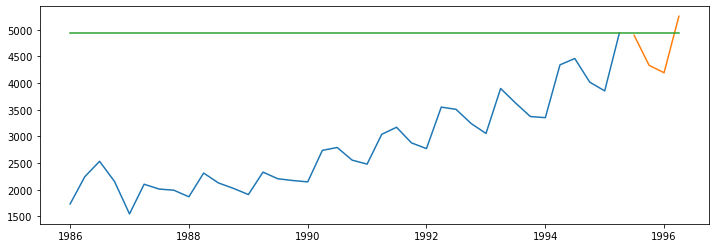

In [81]:
plt.figure(figsize=(12,4))
plt.plot(train_ewma, label='Train')
plt.plot(test_ewma, label='Test')
plt.plot(y_hat_ewma['EWMA_Forecast'], label='EWMA_Forecast')
plt.show()

 ## Exponential Smoothing Techniques
 
  ##### 1) Single Exponentail Smoothing (SES-Level)
   ##### 2) Double Exponetail Smoothing (Holt's Method-Level+Trend)
   ##### 3) Holt Winter Method (Level+Trend+Seasonality)

In [82]:
CC_EST=cc_df.copy()
CC_EST.head()

,Sales
Quarter,
1986-01-01,3.729331
1986-04-01,3.858222
1986-07-01,3.918739
1986-10-01,3.837764
1987-01-01,3.672301


 ## Single Exponentail Smoothing (SES-Level)

In [83]:
CC_SES=CC_EST.copy()

In [84]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

In [85]:
model_ses12=SimpleExpSmoothing(CC_SES['Sales'])
fitted_model=model_ses12.fit(smoothing_level=alpha, optimized=False)
CC_EST['SES12']=fitted_model.fittedvalues.shift(-1)
CC_EST.head()

,Sales,SES12
Quarter,,
1986-01-01,3.729331,3.729331
1986-04-01,3.858222,3.749161
1986-07-01,3.918739,3.775250
1986-10-01,3.837764,3.784867
1987-01-01,3.672301,3.767549


 ## Evaluate the Model

In [86]:
 #Spliiting the data

train_ses=CC_MA.head(38)
test_ses=CC_MA.tail(4)

In [87]:
ses_model= SimpleExpSmoothing(train_ses['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start = test_ses.index[0], end=test_ses.index[-1])

In [88]:
mse_ses=mean_squared_error(test_ses.Sales, pred_ses)
mse_ses.round()

602922.0

In [89]:
rmse_ses=np.sqrt(mean_squared_error(test_ses.Sales, pred_ses)).round(2)
rmse_ses

776.48

In [90]:
SES={"MODEL":pd.Series(["Single Exponeatail Smoothing"]),"RMSE":pd.Series([rmse_ses]),"MSE":pd.Series([mse_ses])}
SES=pd.DataFrame(SES)
SES.round(2)

,MODEL,RMSE,MSE
0,Single Exponeatail Smoothing,776.48,602921.86


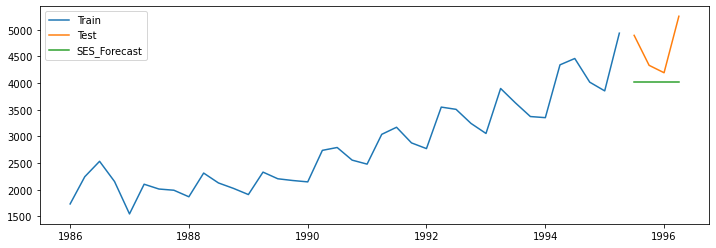

In [91]:
plt.figure(figsize=(12,4))
plt.plot(train_ses['Sales'], label='Train')
plt.plot(test_ses['Sales'], label='Test')
plt.plot(pred_ses, label='SES_Forecast')
plt.legend(loc='best')
plt.show()

 ## Double Exponential Smoothing (Holt method )

In [92]:
CC_DES=CC_EST.copy()
CC_DES.head()

,Sales,SES12
Quarter,,
1986-01-01,3.729331,3.729331
1986-04-01,3.858222,3.749161
1986-07-01,3.918739,3.775250
1986-10-01,3.837764,3.784867
1987-01-01,3.672301,3.767549


In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_add12=ExponentialSmoothing(CC_DES['Sales'], trend='add')
fitted_model=model_add12.fit()
CC_EST['DESadd12']=fitted_model.fittedvalues.shift(-1)
CC_EST.head()

,Sales,SES12,DESadd12
Quarter,,,
1986-01-01,3.729331,3.729331,3.769922
1986-04-01,3.858222,3.749161,3.790364
1986-07-01,3.918739,3.775250,3.822539
1986-10-01,3.837764,3.784867,3.833637
1987-01-01,3.672301,3.767549,3.805938


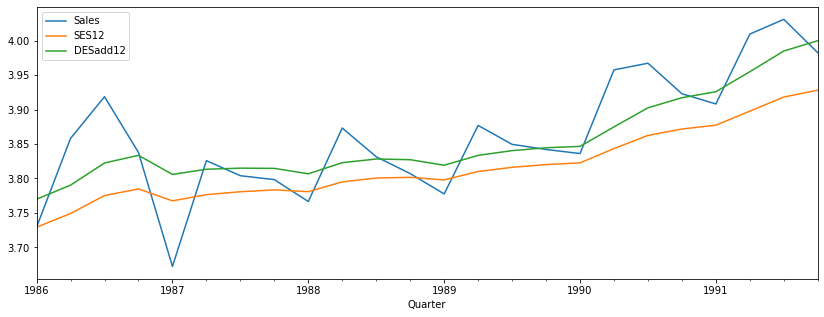

In [94]:
CC_EST[['Sales','SES12','DESadd12']].iloc[:24].plot(figsize=(14,5)).autoscale(axis='x', tight=True)

 ## Evaluate the Model

In [95]:
#Splitting the data
train_des=CocaCola_Sales.copy().head(38)
test_des=CocaCola_Sales.copy().tail(4)

In [96]:
model_des = ExponentialSmoothing(train_des["Sales"]).fit()
pred_des = model_des.predict(start = test_des.index[0],end = test_des.index[-1])

In [97]:
mse_des=mean_squared_error(test_des, pred_des)
mse_des.round(2)

213972.7

In [98]:
rmse_des= np.sqrt(mean_squared_error(test_des, pred_des)).round(2)
rmse_des

462.57

In [99]:
DES={"MODEL":pd.Series(["Double Exponential Smoothing"]),"RMSE":pd.Series([rmse_des]),"MSE":pd.Series([mse_des])}
DES=pd.DataFrame(DES)
DES.round(2)

,MODEL,RMSE,MSE
0,Double Exponential Smoothing,462.57,213972.7


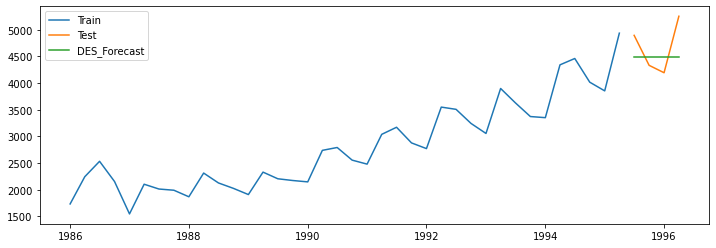

In [458]:

plt.figure(figsize=(12,4))
plt.plot(train_des, label="Train")
plt.plot(test_des, label="Test")
plt.plot(pred_des, label="DES_Forecast")
plt.legend(loc='best')

plt.show()

 ## Triple Exponential Smoothing(Holt Winters Method)

In [101]:
CC_EST['TESadd12']=ExponentialSmoothing(CC_EST['Sales'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
CC_EST.head()

,Sales,SES12,DESadd12,TESadd12
Quarter,,,,
1986-01-01,3.729331,3.729331,3.769922,3.729206
1986-04-01,3.858222,3.749161,3.790364,3.848229
1986-07-01,3.918739,3.775250,3.822539,3.864134
1986-10-01,3.837764,3.784867,3.833637,3.871644
1987-01-01,3.672301,3.767549,3.805938,3.783387


In [102]:
CC_EST['TESmul12']=ExponentialSmoothing(CC_EST['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
CC_EST.head()

,Sales,SES12,DESadd12,TESadd12,TESmul12
Quarter,,,,,
1986-01-01,3.729331,3.729331,3.769922,3.729206,3.729436
1986-04-01,3.858222,3.749161,3.790364,3.848229,3.843021
1986-07-01,3.918739,3.775250,3.822539,3.864134,3.863367
1986-10-01,3.837764,3.784867,3.833637,3.871644,3.872584
1987-01-01,3.672301,3.767549,3.805938,3.783387,3.786540


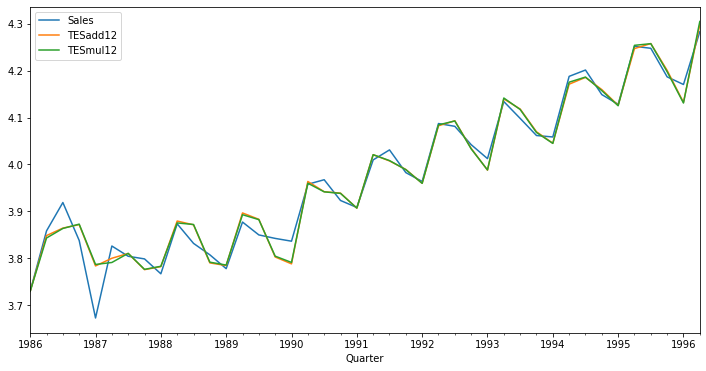

In [103]:
CC_EST[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

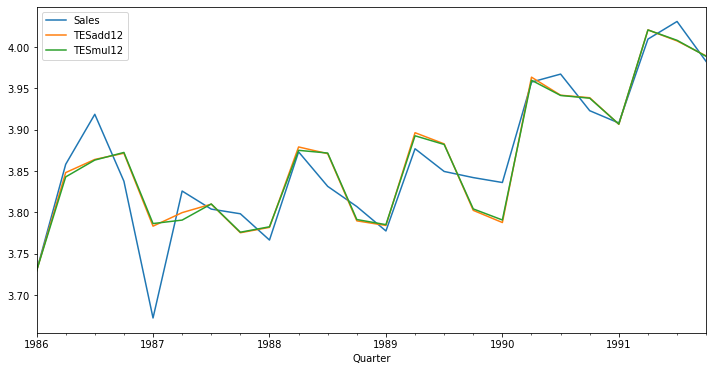

In [104]:
CC_EST[['Sales','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

 ## Eveluate the Model

In [105]:
hwm=CC_DES.copy()

In [106]:
#Splitting the data
train_hwm=CocaCola_Sales.head(38)
test_hwm=CocaCola_Sales.tail(4)

In [107]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwm_model_add = ExponentialSmoothing(train_hwm["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwm_add = hwm_model_add.predict(start = test_hwm.index[0],end = test_hwm.index[-1])

In [108]:
mse_hwm_add=mean_squared_error(test_hwm, pred_hwm_add)
mse_hwm_add.round(2)

41744.39

In [109]:
rmse_hwm_add = np.sqrt(mean_squared_error(test_hwm.Sales, pred_hwm_add)).round(2)
rmse_hwm_add

204.31

In [110]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwm_model_mul=ExponentialSmoothing(train_hwm['Sales'],seasonal="mul",trend="add", seasonal_periods=12).fit()
pred_hwm_mul=hwm_model_mul.predict(start =test_hwm.index[0],end=test_hwm.index[-1])

In [111]:
mse_hwm_mul=mean_squared_error(test_hwm, pred_hwm_mul)
mse_hwm_mul.round(2)

38593.07

In [112]:
rmse_hwm_mul=np.sqrt(mean_squared_error(test_hwm.Sales, pred_hwm_mul)).round(2)
rmse_hwm_mul

196.45

In [113]:
HWM_Additive={"MODEL":pd.Series(["Holt Winters Method_Additive"]),"RMSE":pd.Series([rmse_hwm_add]),"MSE":pd.Series([mse_hwm_add])}
HWM_Additive=pd.DataFrame(HWM_Additive)
HWM_Additive.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Additive,204.31,41744.39


In [114]:
HWM_Multiplicative={"MODEL":pd.Series(["Holt Winters Method_Multiplicative"]),"RMSE":pd.Series([rmse_hwm_mul]),"MSE":pd.Series([mse_hwm_mul])}
HWM_Multiplicative=pd.DataFrame(HWM_Multiplicative)
HWM_Multiplicative.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Multiplicative,196.45,38593.07


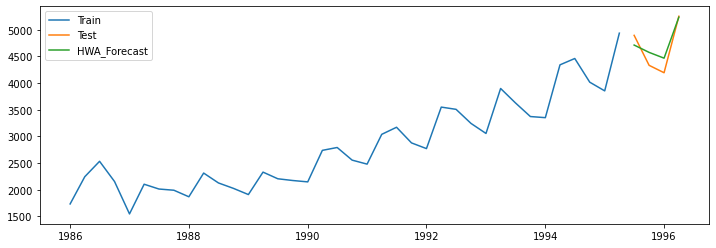

In [115]:
#Plot_Additive
plt.figure(figsize=(12,4))
plt.plot(train_hwm, label='Train')
plt.plot(test_hwm, label='Test')
plt.plot(pred_hwm_add, label='HWA_Forecast')
plt.legend(loc='best')
plt.show()

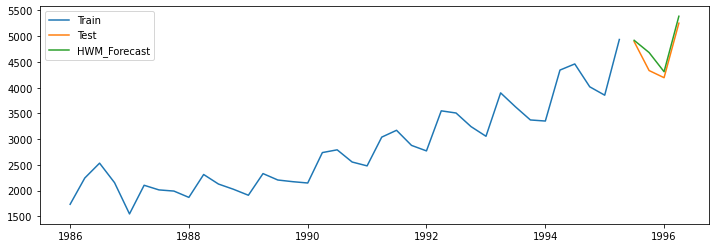

In [116]:
#Plot_Multiplicative
plt.figure(figsize=(12,4))
plt.plot(train_hwm, label='Train')
plt.plot(test_hwm, label='Test')
plt.plot(pred_hwm_mul, label='HWM_Forecast')
plt.legend(loc='best')
plt.show()

 ## ARMA Model

 ## Atuo Regressive Model(AR)

 ### Stationary vs Non-stationary Time Series

In [117]:
AR_df=cc_df.copy()
AR_df.head()

,Sales
Quarter,
1986-01-01,3.729331
1986-04-01,3.858222
1986-07-01,3.918739
1986-10-01,3.837764
1987-01-01,3.672301


 ## 1) Visually checking the Stationarity

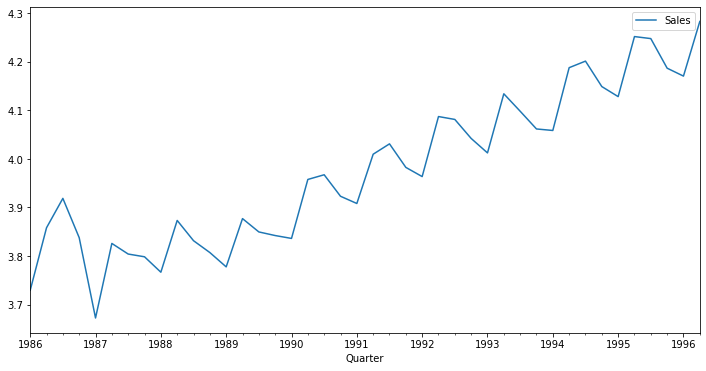

In [118]:
AR_df.plot(figsize=(12,6))
plt.show()

 ### Observation

 #### Trend and Variance is not constant   
    

 ## 2) Augmented Dickey Fuller Test(Checking Seasonality)
 
 Null Hypothesis (H0): The series is not stationary
 p-val>0.05
 
 Alternate Hypothesis (H1): The series is stationary
 p-val<0.05

 ## Stationary check Method
 ### Duckey Fuller Method

In [119]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [120]:
from statsmodels.tsa.stattools import adfuller

#Ho=It is not stationary
#H1=It is stationary
def adf_test(AR_df):    
    result = adfuller(AR_df.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [121]:
adf_test(AR_df['Sales'])

Fail to reject the null hypothesis
Data is non-stationary


In [122]:
adf_test=adfuller(AR_df['Sales'])
adf_test

(0.1928204403883323,
 0.9718560272326259,
 6,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -155.77035880778857)

P-value(0.996)>critical value(0.05)

Failed to reject null hypothesis (Series is not Stationary)

Hance, the time series is Non Stationary.

 ### Converting Non-Stationary to Stattionary Time Series Methods

 ### 1)Rollling Statistics
 ### 2)Transformation Method
 ### 3)Differencing Method

In [123]:
AR_df.head()

,Sales
Quarter,
1986-01-01,3.729331
1986-04-01,3.858222
1986-07-01,3.918739
1986-10-01,3.837764
1987-01-01,3.672301


 ### Method-1 Rolling Statistics

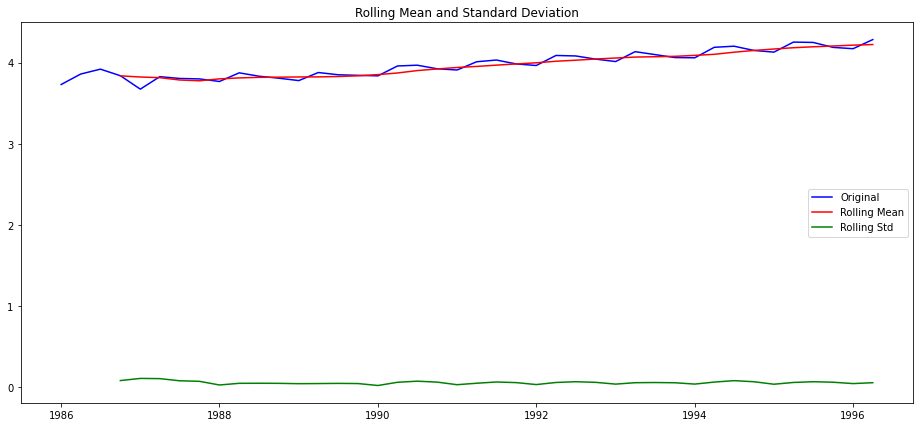

In [124]:
# Determing Rolling statistics

rollmean=AR_df.rolling(4).mean()
rollstd=AR_df.rolling(4).std()

plt.figure(figsize=(16, 7))
fig =plt.figure(1)

#Plot rolling statistics

orig= plt.plot(AR_df, color='blue', label='Original')
mean=plt.plot(rollmean, color='red', label='Rolling Mean')
std=plt.plot(rollstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

 ## Observation
    Rolling std is constant but rolling mean is not constant, it is still data is Non-Stationary

 ## Method 2- Transformation

 ### Log Types
     1) Adj_log
     2) Adj_sqrt
     3) Adj_cbrt

In [125]:
import numpy as np

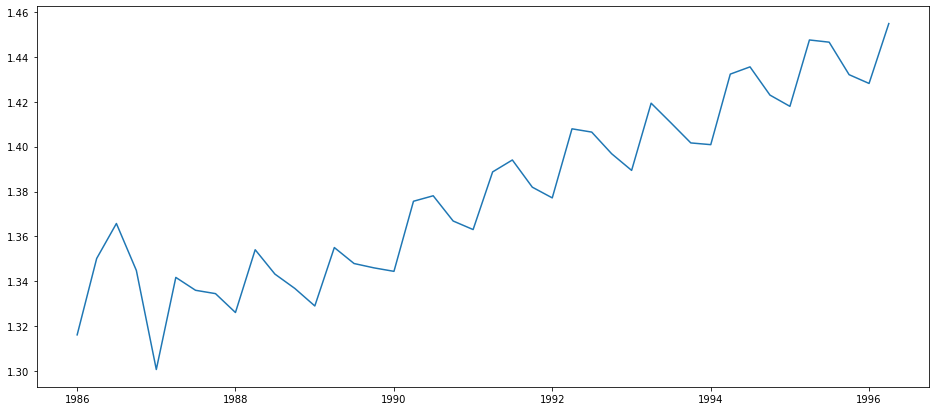

In [126]:
ts_log=np.log(AR_df)

plt.figure(figsize=(16,7))
fig=plt.figure(1)
plt.plot(ts_log)

 ### Still data is not stationary , now we will check decompose seasonal

# 

 ## Decomposition

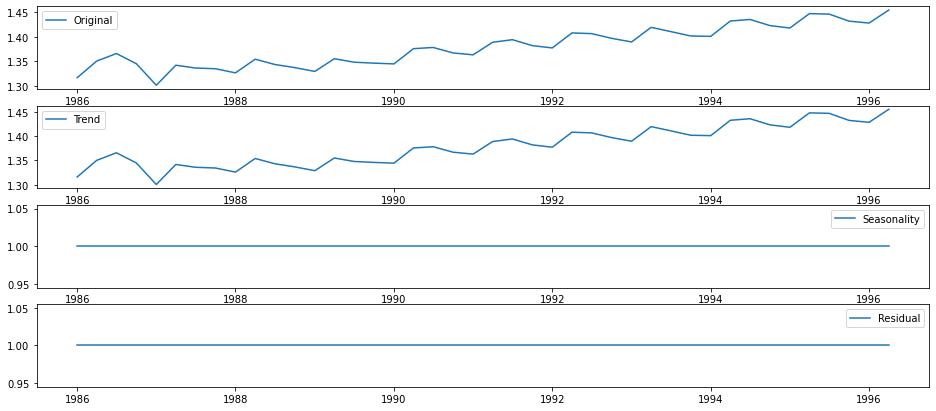

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition= seasonal_decompose(ts_log, freq=1, model='multiplicative')

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plt.figure(figsize=(16,7))
fig= plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

 ## Method -3 - Differencing Method
 
 y(t) =y(t)-y(t-1)

In [252]:
ts_test=ts_log_diff1.set_index

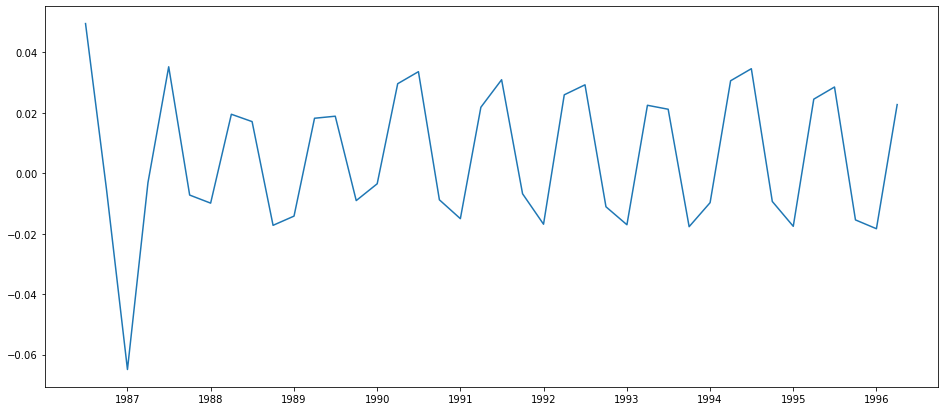

In [253]:
ts_log_diff=ts_log - ts_log.shift(2)

ts_log_diff1=ts_log_diff.dropna()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.plot(ts_log_diff1)

In [130]:
def adfuller_test(Sales):
    result=adfuller(Sales)
    label=['ADF Test Statistic', 'p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, label):
        print(label+': '+str(value))
    if result[1] <=0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is  non-stationary")

In [131]:
adfuller_test(ts_log_diff1)

ADF Test Statistic: -4.822898876369731
p-value: 4.915786000895962e-05
#Lags Used: 4
Number of Observations Used: 35
Reject the null hypothesis
Data is stationary


 ## Observation-
I have used different methods for converting not Stationary to Stationary data,like Rolling Statistics, Differencing Method and Transformation Method, finally I have got stationary data after using Differencing method.

1)We can see that there is no trend (upward or downward) above grap.

2)It is a horizontal trend.

3)The Mean and Variance is constant.

 ## LLR

In [132]:
# Finding the lag values for AR Model

def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR, DF).round(3)
    return p

 ## ACF and PACF for Returns

In [133]:
import statsmodels.graphics.tsaplots as sgt

 ### Autocorrelation Funcation(ACF)

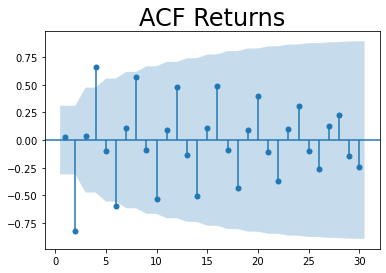

In [134]:
sgt.plot_acf(ts_log_diff1, lags=30, zero=False,)
plt.title("ACF Returns", size=24)
plt.show()

Observation-

1)The shaded portion is the significant.

2)With lag 4, the series is just correlated with itself. Hence, correlation=0.74 at lag=4.

3)ACF captures both direct and indirect correlation with the lag time.


 ### Partial Autocorrelation function (PACF)

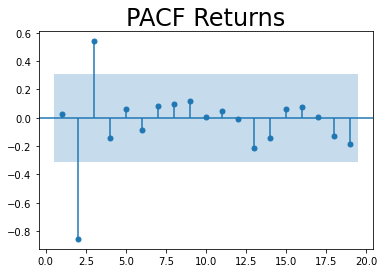

In [135]:
sgt.plot_pacf(ts_log_diff1, lags=19, zero = False, method=('ols'))
plt.title("PACF Returns", size=24)
plt.show()

Observation-

1)The shaded portion is the significant.

2)With lag 3, the series is just correlated with itself. Hence, correlation=0.5 at lag=3.

3)PACF captures direct correlation with the lag time.


 ## AR for Returns (Lag Calculation)

In [136]:
from statsmodels.tsa.arima_model import ARMA

In [137]:
# AR_lag-1

model_ar1=ARMA(ts_log_diff1, order=(1,0))
results_ar1=model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(1, 0)   Log Likelihood                  94.008
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sat, 15 May 2021   AIC                           -182.016
Time:                        17:16:49   BIC                           -176.949
Sample:                    07-01-1986   HQIC                          -180.184
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0055      0.004      1.449      0.147      -0.002       0.013
ar.L1.Sales     0.0295      0.165      0.179      0.858      -0.294       0.353
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           33.8865           +0.0000j           33.8865            0.0000
-----------------------------------------------------------------------------
"""

In [138]:
 # AR_Lag 2
    
model_ar2=ARMA(ts_log_diff1, order=(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(2, 0)   Log Likelihood                 122.553
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 15 May 2021   AIC                           -237.105
Time:                        17:16:50   BIC                           -230.350
Sample:                    07-01-1986   HQIC                          -234.662
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0051      0.001      5.255      0.000       0.003       0.007
ar.L1.Sales     0.0971      0.079      1.231      0.218      -0.057       0.252
ar.L2.Sales    -0.8961      0.064    -13.993      0.000      -1.022      -0.771
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0542           -1.0550j            1.0564           -0.2418
AR.2            0.0542           +1.0550j            1.0564            0.2418
-----------------------------------------------------------------------------
"""

In [139]:
LLR_test(model_ar1, model_ar2)

0.0

In [140]:
 #AR_Lag3
    
model_ar3=ARMA(ts_log_diff1, order=(3,0))
results_ar3=model_ar3.fit()
print(results_ar3.summary())
print("LLR_test:"+str(LLR_test(model_ar2, model_ar3)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(3, 0)   Log Likelihood                 132.131
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 15 May 2021   AIC                           -254.263
Time:                        17:16:51   BIC                           -245.818
Sample:                    07-01-1986   HQIC                          -251.210
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0042      0.002      1.884      0.060      -0.000       0.009
ar.L1.Sales     0.6590      0.123      5.336      0.000       0.417       0.901
ar.L2.Sales    -0.9293      0.045    -20.524    

In [141]:
 #AR_Lag4
model_ar4=ARMA(ts_log_diff1, order=(4,0))
result_ar4=model_ar4.fit()
print(result_ar4.summary())
print("LLR test:" + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(4, 0)   Log Likelihood                 132.711
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 15 May 2021   AIC                           -253.421
Time:                        17:16:52   BIC                           -243.288
Sample:                    07-01-1986   HQIC                          -249.757
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0046      0.002      2.465      0.014       0.001       0.008
ar.L1.Sales     0.7694      0.159      4.842      0.000       0.458       1.081
ar.L2.Sales    -1.0961      0.160     -6.870    

  ### Observation
    
    P values very high moving to Model 3 to Model 4, there is no model improvments.
    Model 3 is good values for P.

 ## Analysing the Residuals

In [142]:
ts_log_diff1['res_ret']=results_ar3.resid

In [143]:
ts_log_diff1.res_ret.mean()

0.0012250495217919898

In [144]:
ts_log_diff1.res_ret.std()

0.011359620744156026

In [145]:
sts.adfuller(ts_log_diff1.res_ret)

(-7.851679322665733,
 5.579549445838743e-12,
 0,
 39,
 {'1%': -3.610399601308181,
  '5%': -2.939108945868946,
  '10%': -2.6080629651545038},
 -223.70292137822037)

 ## ACF of Residuals for Returns

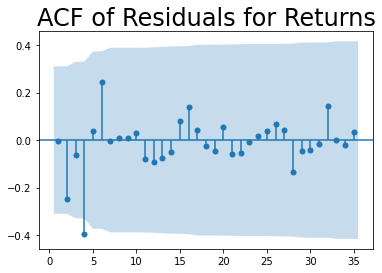

In [146]:
sgt.plot_acf(ts_log_diff1.res_ret, zero=False, lags=35)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

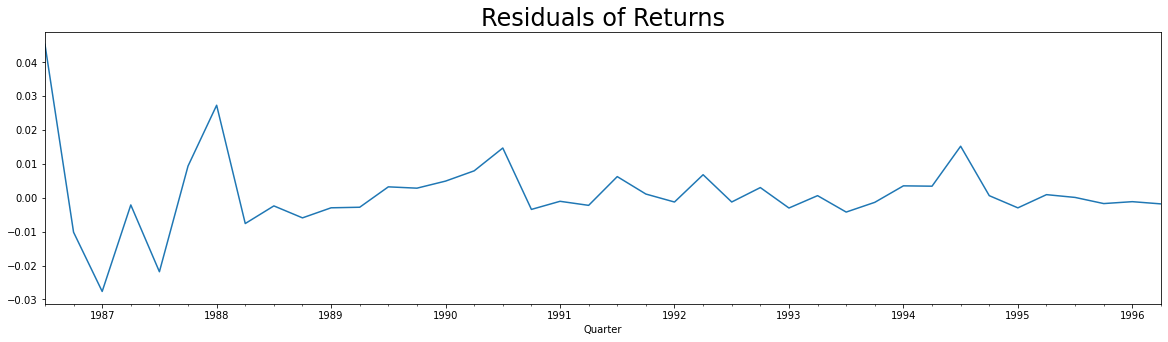

In [147]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

 ## Building the Auto Regressive Model(AR)

In [148]:
from statsmodels.tsa.arima_model import ARIMA

In [149]:
len(ts_log_diff1)

40

In [150]:
train_len=36

In [151]:
 # Splitting ts_log_diff1
train_AR=ts_log_diff1.iloc[:36]
test_AR=ts_log_diff1.iloc[36:]

In [152]:
model =ARIMA(train_AR['Sales'], order=(2,0,0))

results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(2, 0)   Log Likelihood                 108.384
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 15 May 2021   AIC                           -208.768
Time:                        17:17:02   BIC                           -202.434
Sample:                    07-01-1986   HQIC                          -206.557
                         - 04-01-1995                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0052      0.001      4.736      0.000       0.003       0.007
ar.L1.Sales     0.1041      0.088      1.189      0.234      -0.067       0.276
ar.L2.Sales    -0.8859      0.071    -12.494      0.000      -1.025      -0.747
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0587           -1.0608j            1.0625           -0.2412
AR.2            0.0587           +1.0608j            1.0625            0.2412
-----------------------------------------------------------------------------
"""

In [153]:
model_fit =model.fit()
model_fit.params

const          0.005209
ar.L1.Sales    0.104081
ar.L2.Sales   -0.885878
dtype: float64

 ## Observation
    
    constant=0.041691
    
    Coefficient=-0.886947
   
 The AR model has only one lag or p=6. Hence, we can represent the model as AR(2)

 ## Use Model to Predict_AR Model

In [154]:
# Obtain Predicted values
start=len(train_AR)
end=len(ts_log_diff1)-1
predictions_ar=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_ar=predictions_ar.rename('ARIMA(2,0,0) Predictions')

In [155]:
 # Compare predictions to expected values #<11.10

for i in range (len(predictions_ar)):
    print(f"predicted={predictions_ar[i]:<11.10}, expected={test_AR['Sales'][i]}")

predicted=0.02738836117, expected=0.028546681568430543
predicted=-0.00959341968, expected=-0.015439651097697293
predicted=-0.01598032228, expected=-0.018359588858085196
predicted=0.0161162884, expected=0.022732114664524516


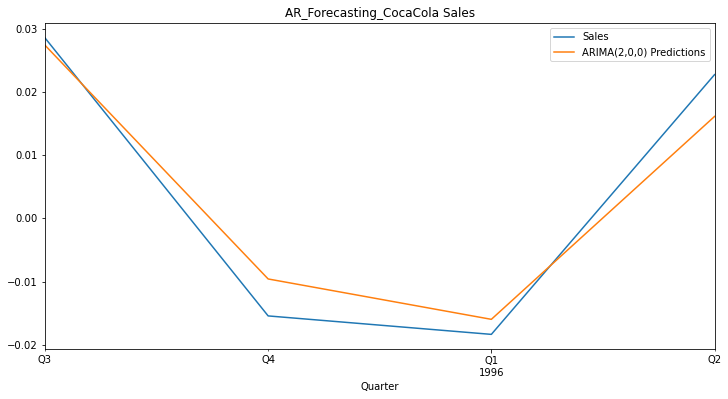

In [156]:
# Plot Predictions against know values
title='AR_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel=''

test_AR['Sales'].plot(legend=True, figsize=(12,6),title=title)
predictions_ar.plot(legend=True)
plt.show()

 ## Retrain the model on the full data and forecast the future

In [157]:
model=ARIMA(cc_df['Sales'], order=(2,0,0))
results=model.fit()
fcast_ar=results.predict(len(cc_df), len(cc_df)+3, typ='level').rename('ARIMA(2,0,0) Forecast')

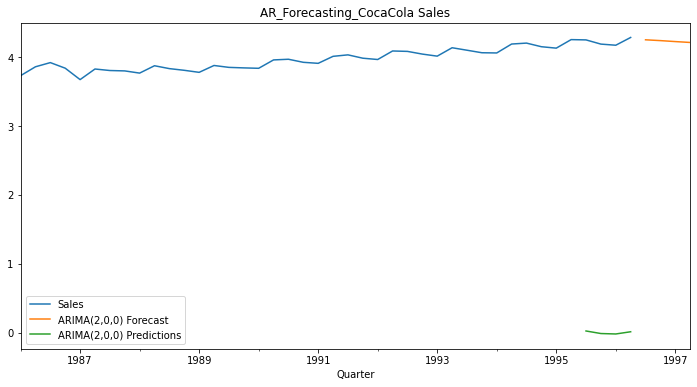

In [158]:
# Plot predictions against know values

title ='AR_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period'

cc_df['Sales'].plot(legend=True, figsize=(12,6), title=title)
fcast_ar.plot(legend=True)
predictions_ar.plot(legend=True)
plt.show()

 # 4 Quarters Forecast Values for AR model

In [159]:
fcast_ar

1996-07-01    4.249364
1996-10-01    4.237639
1997-01-01    4.223619
1997-04-01    4.210799
Freq: QS-JAN, Name: ARIMA(2,0,0) Forecast, dtype: float64

 ## MSE and RMSE_AR Model

In [160]:
AR=CocaCola_Sales.copy()
len(AR)

42

In [161]:
Train_ar=AR.head(38)
Test_ar=AR.tail(4)

In [162]:
#MSE
mse_ar=mean_squared_error(Test_ar.Sales, predictions_ar)
mse_ar.round(2)

21979834.68

In [163]:
rmse_ar=np.sqrt(mean_squared_error(Test_ar.Sales, predictions_ar)).round(2)
rmse_ar

4688.27

In [164]:
AR={"MODEL":pd.Series(["AR_Model"]),"RMSE":pd.Series([rmse_ar]),"MSE":pd.Series([mse_ar])}
AR=pd.DataFrame(AR)
AR.round(2)

,MODEL,RMSE,MSE
0,AR_Model,4688.27,21979834.68


 # MA for Returns (Lag Calculation)

In [165]:
# MA_Lag 1
model_ma1=ARMA(ts_log_diff1['Sales'], order =(0,1)) #ts_log_diff1
results_ma1=model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 1)   Log Likelihood                 104.781
Method:                       css-mle   S.D. of innovations              0.017
Date:                Sat, 15 May 2021   AIC                           -203.563
Time:                        17:17:21   BIC                           -198.496
Sample:                    07-01-1986   HQIC                          -201.731
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0064      0.005      1.211      0.226      -0.004       0.017
ma.L1.Sales     0.9999      0.087     11.467      0.000       0.829       1.171
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [166]:
# MA_Lag 2
model_ma2=ARMA(ts_log_diff1['Sales'], order =(0,2)) 
results_ma2=model_ma2.fit()
results_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 2)   Log Likelihood                 110.441
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sat, 15 May 2021   AIC                           -212.882
Time:                        17:17:22   BIC                           -206.126
Sample:                    07-01-1986   HQIC                          -210.439
                         - 04-01-1996                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0057      0.001      5.284      0.000       0.004       0.008
ma.L1.Sales     0.2066      0.136      1.524      0.127      -0.059       0.472
ma.L2.Sales    -0.7929      0.129     -6.146      0.000      -1.046      -0.540
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0003           +0.0000j            1.0003            0.5000
MA.2            1.2608           +0.0000j            1.2608            0.0000
-----------------------------------------------------------------------------
"""

In [167]:
LLR_test(model_ma1, model_ma2)

0.001

In [168]:
#MR_Lag3
model_ma3=ARMA(ts_log_diff1['Sales'], order =(0,3))
results_ma3=model_ma3.fit()
print(results_ma3.summary())
print ("LLR test: " + str(LLR_test(model_ma2, model_ma3)))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   40
Model:                     ARMA(0, 3)   Log Likelihood                 118.140
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sat, 15 May 2021   AIC                           -226.281
Time:                        17:17:24   BIC                           -217.836
Sample:                    07-01-1986   HQIC                          -223.227
                         - 04-01-1996                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0061      0.001     11.907      0.000       0.005       0.007
ma.L1.Sales     0.7166      0.131      5.469      0.000       0.460       0.973
ma.L2.Sales    -0.9246      0.170     -5.432    

## Observation
q values very high moving to Model2  to Model3, there is no model improvments. 

Model 2 is good values for q.

 ## Analysing the Residuals

In [169]:
ts_log_diff1['res_ret']=results_ar2.resid

In [170]:
ts_log_diff1.res_ret.mean()

0.0007034277638305347

In [171]:
ts_log_diff1.res_ret.std()

0.012815235291548406

In [172]:
ts_log_diff1.res_ret.var()

0.00016423025557774779

In [173]:
sts.adfuller(ts_log_diff1.res_ret)

(-3.7460761240795293,
 0.0035098027526038683,
 4,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -218.86548202765317)

 ## ACF of Residuals for Returns

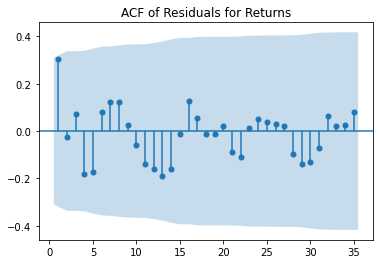

In [174]:
sgt.plot_acf(ts_log_diff1.res_ret,zero=False, lags=35)
plt.title("ACF of Residuals for Returns")
plt.show()

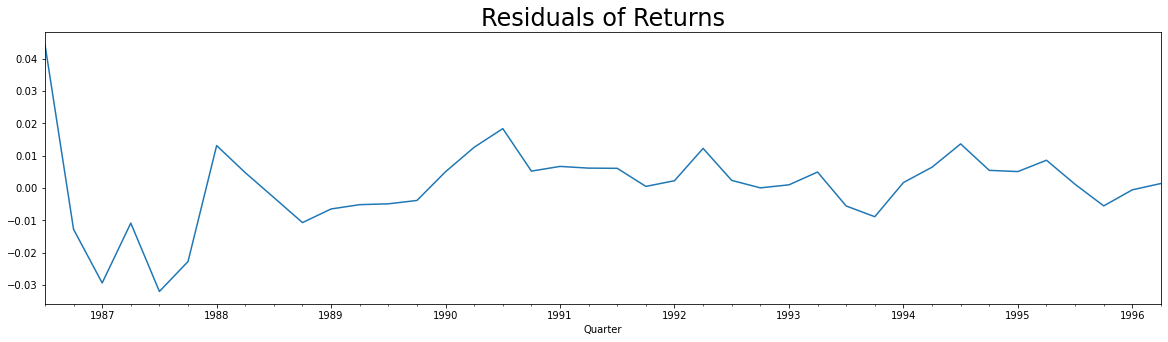

In [175]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

 ## Building the Moving Average (MA)
 
 q parameter= 2 MA(2) Model
 
  p = 0 and d = 0 As we are not considering these two parameters in this model.

In [370]:
from statsmodels.tsa.arima_model import ARIMA
# Splitting ts_log_diff1
train_ma=ts_log_diff1.iloc[:36]
test_ma=ts_log_diff1.iloc[36:]

In [372]:
model = ARIMA(train_ma['Sales'],order=(0,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(0, 2)   Log Likelihood                  98.625
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sat, 15 May 2021   AIC                           -189.251
Time:                        17:49:05   BIC                           -182.917
Sample:                    07-01-1986   HQIC                          -187.040
                         - 04-01-1995                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0056      0.001      4.594      0.000       0.003       0.008
ma.L1.Sales     0.2229      0.143      1.554      0.120      -0.058       0.504
ma.L2.Sales    -0.7770      0.136     -5.727      0.000      -1.043      -0.511
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.2869           +0.0000j            1.2869            0.0000
-----------------------------------------------------------------------------
"""

In [373]:
model_fit=model.fit()
model_fit.params

const          0.005624
ma.L1.Sales    0.222914
ma.L2.Sales   -0.777048
dtype: float64

 ## Observation-
constant =  0.005624 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient =-0.777048

The MA model has only one lag or p=2. Hence, we can represent the model as AR(2)

 ## User Model to Predict_MA Model

In [374]:
# Obtain Predicted values

start=len(train_MA)
end=len(ts_log_diff1)-1
predictions_ma=results.predict(start=start, end=end, dynamic=False, typ='level')
predictions_ma=predictions_ma.rename('ARIMA(0,0,2) Predictions')

In [375]:
# Compare predictions to expected values # <11.10
for i in range(len(predictions_ma)):
    print(f"predicted={predictions_ma[i]:<11.10}, expected={test_MA['Sales'][i]}")

predicted=0.01334815064, expected=0.028546681568430543
predicted=-0.005273748528, expected=-0.015439651097697293
predicted=0.005624327592, expected=-0.018359588858085196
predicted=0.005624327592, expected=0.022732114664524516


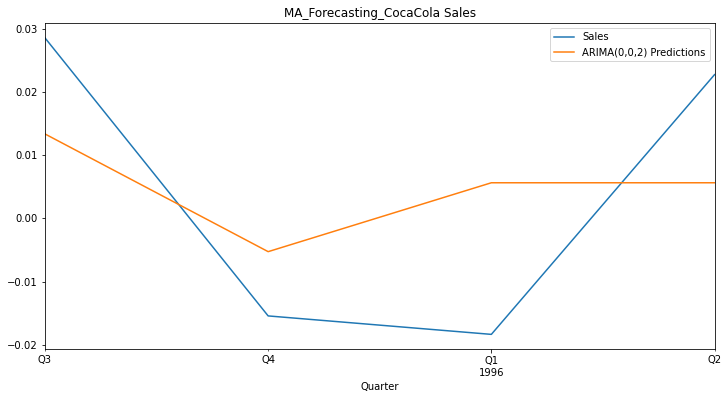

In [376]:
 # Plot predictions against known values
    
title='MA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel=''

test_MA['Sales'].plot(legend=True, figsize=(12, 6),title=title)
predictions_ma.plot(legend=True)
plt.show()

 ## Retrain the model on the full data and forecast the future

In [377]:
model=ARIMA(cc_df['Sales'], order=(0,0,2))
results=model.fit(disp=-1)
fcast_ma=results.predict(len(cc_df), len(cc_df)+3, typ='levels').rename('ARIMA(0,0,2) Forecast')

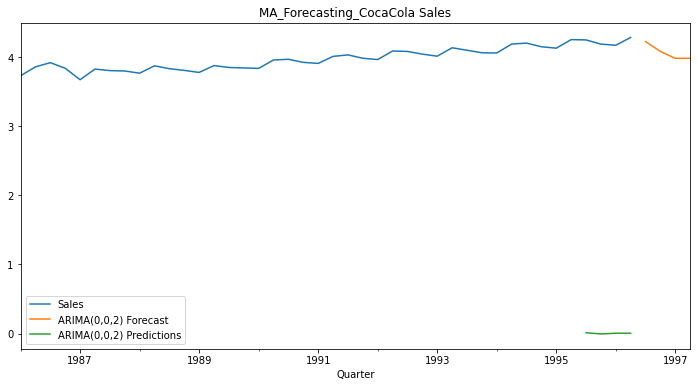

In [379]:
# Plot predictions against known values
title = 'MA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period' 

cc_df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_ma.plot(legend=True)
predictions_ma.plot(legend=True)
plt.show()

 # 4 Quarter Forecast Values for MA Model

In [380]:
fcast_ma

1996-07-01    4.225222
1996-10-01    4.080540
1997-01-01    3.981792
1997-04-01    3.981792
Freq: QS-JAN, Name: ARIMA(0,0,2) Forecast, dtype: float64

 ## MSE and RMSE MA Model

In [381]:
MA=CocaCola_Sales.copy()

In [382]:
Train_ma=MA.head(38)
Test_ma=MA.tail(4)

In [386]:
#MSE
mse_ma=mean_squared_error(Test_ma.Sales, predictions_ma)
mse_ma.round(2)

21979841.94

In [387]:
#RMSE
rmse_ma=np.sqrt(mean_squared_error(Test_ma.Sales, predictions_ma)).round(2)
rmse_ma

4688.27

In [388]:
MA={"MODEL":pd.Series(["MA_Model"]),"RMSE":pd.Series([rmse_ma]),"MSE":pd.Series([mse_ma])}
MA=pd.DataFrame(MA)
MA.round(2)

,MODEL,RMSE,MSE
0,MA_Model,4688.27,21979841.94


## Autoregressive Integrated Moving Averages (ARIMA)
Recall that an AR(1) model follows the formula

 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 
while an MA(1) model follows the formula

 𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 
where 𝑐 is a constant, 𝜇 is the expectation of 𝑦𝑡 (often assumed to be zero), 𝜙1 is the AR lag coefficient, 𝜃1 (theta-sub-one) is the MA lag coefficient, and 𝜀 (epsilon) is white noise.

An ARMA(1,1) model therefore follows

 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡

 ## Building the ARIMA

In [393]:
 # Splitting ts_log_diff1
train_ARIMA=ts_log_diff1.head(36)
test_ARIMA=ts_log_diff1.tail(4)

In [394]:
model=ARIMA(train_ARIMA['Sales'],order=(2,1,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 114.036
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sat, 15 May 2021   AIC                           -216.073
Time:                        17:51:22   BIC                           -206.741
Sample:                    10-01-1986   HQIC                          -212.851
                         - 04-01-1995                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.361      0.174      -0.000       0.001
ar.L1.D.Sales    -0.0685      0.072     -0.955      0.339      -0.209       0.072
ar.L2.D.Sales    -0.9440      0.049    -19.121      0.000      -1.041      -0.847
ma.L1.D.Sales    -0.1305      0.177     -0.737      0.461      -0.477       0.216
ma.L2.D.Sales    -0.5127      0.187     -2.745      0.006      -0.879      -0.147
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0363           -1.0286j            1.0293           -0.2556
AR.2           -0.0363           +1.0286j            1.0293            0.2556
MA.1            1.2751           +0.0000j            1.2751            0.0000
MA.2           -1.5297           +0.0000j            1.5297            0.5000
-----------------------------------------------------------------------------
"""

In [395]:
model_fit=model.fit()
model_fit.params

const            0.000408
ar.L1.D.Sales   -0.068514
ar.L2.D.Sales   -0.943967
ma.L1.D.Sales   -0.130537
ma.L2.D.Sales   -0.512689
dtype: float64

## Observation-
constant = 0.000408 . Because we saw in the Stationary time series that the mean was almost close to zero.

Coefficient = AR=--0.943967 and MA=-0.512689

The ARIMA model has e lag or 2-1-2. Hence, we can represent the model as ARIMA(2-1-2)

## Use Model to Predict_ARIMA Model

In [397]:
# Obtain Predicted values
start=len(train_ARIMA)
end=len(ts_log_diff1)-1
predictions_arima=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_arima=predictions_arima.rename('ARIMA(2,1,2) Predictions')

In [399]:
# Compare predictions to expected values
for i in range(len(predictions_arima)):
    print(f"predicted={predictions_arima[i]:<11.10}, expected={test_ARIMA['Sales'][i]}")

predicted=0.03197963888, expected=0.028546681568430543
predicted=-0.005715201891, expected=-0.015439651097697293
predicted=-0.009349220408, expected=-0.018359588858085196
predicted=0.02730403364, expected=0.022732114664524516


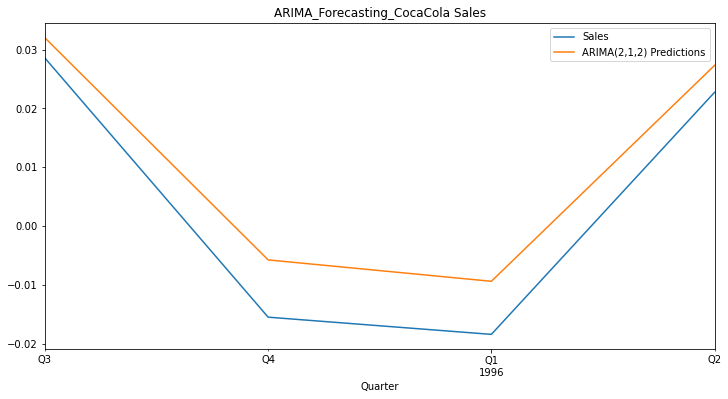

In [401]:
# Plot predictions against known values
title = 'ARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='' 

test_ARIMA['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions_arima.plot(legend=True)
plt.show()

 ## Retrain the model on the full data, and forecast the future

In [402]:
model=ARIMA(cc_df['Sales'], order=(2,1,2))
results=model.fit(disp=-1)
fcast_ARIMA=results.predict(len(cc_df), len(cc_df)+3, typ='levels').rename('ARIMA(2,1,2) Forecast')

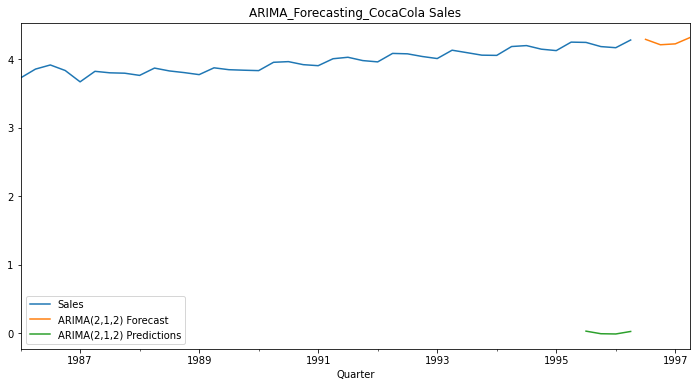

In [403]:
# Plot predictions against known values
title = 'ARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='Period' 

cc_df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_ARIMA.plot(legend=True)
predictions_arima.plot(legend=True)
plt.show()

In [199]:
fcast_ARIMA

1996-07-01    4.292674
1996-10-01    4.213798
1997-01-01    4.226760
1997-04-01    4.320245
Freq: QS-JAN, Name: ARIMA(2,1,2) Forecast, dtype: float64

 ## Evaluate Model

In [446]:
ARIMA=CocaCola_Sales.copy()

In [440]:
Train_arima=ARIMA.head(38)
Test_arima=ARIMA.tail(4)

In [452]:
#MSE
mse_arima=mean_squared_error(Test_arima, fcast_ARIMA)
mse_arima.round(2)

21940061.78

In [454]:
rmse_arima=np.sqrt(mean_squared_error(Test_arima, predictions_arima)).round(2)
rmse_arima

4688.26

In [455]:
ARIMA={"MODEL":pd.Series(["ARIMA_Model"]),"RMSE":pd.Series([rmse_arima]),"MSE":pd.Series([mse_arima])}
ARIMA=pd.DataFrame(ARIMA)
ARIMA.round(2)

,MODEL,RMSE,MSE
0,ARIMA_Model,4688.26,21940061.78


 ## Seasonal Auto Regressive Integrated Moving Average (SARIMA)`

In [409]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [410]:
sarima=CocaCola_Sales.copy()

In [411]:
sarima.head()

,Sales
Quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


 ## Building the SARIMA Model

In [412]:
# Splitting the data
train_sm=sarima.head(38)
test_sm=sarima.tail(4)

In [413]:
model=SARIMAX(train_sm['Sales'], order=(2,1,2), seasonal_order=(2,1,2,4))
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   38
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 4)   Log Likelihood                -213.779
Date:                           Sat, 15 May 2021   AIC                            445.558
Time:                                   17:57:22   BIC                            459.026
Sample:                               01-01-1986   HQIC                           450.090
                                    - 04-01-1995                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2525      0.367      3.417      0.001       0.534       1.971
ar.L2         -0.7480      0.279     -2.679      0.007      -1.295      -0.201
ma.L1         -1.6342      1.414     -1.156      0.248      -4.405       1.136
ma.L2          0.9800      1.640      0.598      0.550      -2.234       4.194
ar.S.L4       -0.0019      0.910     -0.002      0.998      -1.785       1.782
ar.S.L8        0.9981      0.920      1.085      0.278      -0.806       2.802
ma.S.L4       -0.0008      0.548     -0.001      0.999      -1.075       1.074
ma.S.L8       -0.9978      2.160     -0.462      0.644      -5.231       3.235
sigma2      2.015e+04      0.000   7.99e+07      0.000    2.02e+04    2.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.69   Prob(JB):                         0.74
Heteroskedasticity (H):               0.55   Skew:                            -0.12
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.16e+24. Standard errors may be unstable.
"""

In [414]:
model_fit = model.fit()
model_fit.params

ar.L1          1.252545
ar.L2         -0.747976
ma.L1         -1.634185
ma.L2          0.980005
ar.S.L4       -0.001874
ar.S.L8        0.998117
ma.S.L4       -0.000817
ma.S.L8       -0.997823
sigma2     20153.906663
dtype: float64

 ## Use Model to Predict SARIMA 

In [415]:
# Obtain Predicted values
start=len(train_sm)
end=len(sarima)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions=predictions.rename('SARIMA(2,1,2) Predictions')

In [416]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_sm['Sales'][i]}")

predicted=4951.030001, expected=4895.0
predicted=4593.192253, expected=4333.0
predicted=4572.559738, expected=4194.0
predicted=5728.831875, expected=5253.0


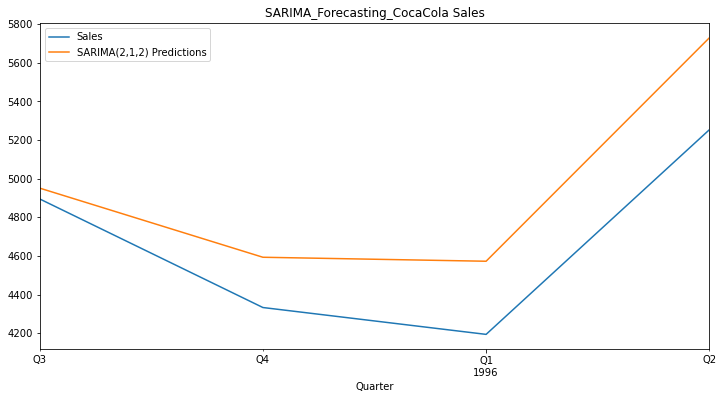

In [417]:
# Plot predictions against known values
title = 'SARIMA_Forecasting_CocaCola Sales'
ylabel='Sales'
xlabel='' 

test_sm['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [418]:
model=SARIMAX(sarima['Sales'], order=(2,1,2))
results=model.fit()
fcast_sarima=results.predict(len(sarima), len(sarima)+3, typ='levels').rename('SARIMA(2,1,2) Forecast')

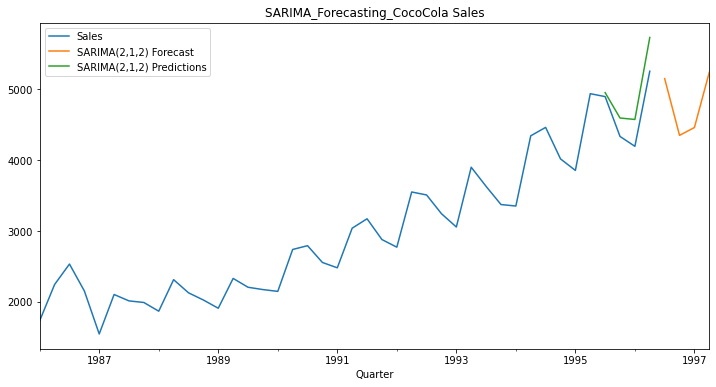

In [419]:
# Plot predictions against known values
title = 'SARIMA_Forecasting_CocoCola Sales'
ylabel='Sales'
xlabel='Period' 

sarima['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast_sarima.plot(legend=True)
predictions.plot(legend=True)
plt.show()

## Observation-
We can see that we are able to capture the trend and seasonality both.

In [420]:
fcast_sarima

1996-07-01    5148.733590
1996-10-01    4348.418342
1997-01-01    4458.979361
1997-04-01    5238.820220
Freq: QS-JAN, Name: SARIMA(2,1,2) Forecast, dtype: float64

 ## Evaluate the Model

In [421]:
mse_sm=mean_squared_error(test_sm.Sales, fcast_sarima)
mse_sm.round(2)

33758.4

In [422]:
rmse_sm=np.sqrt(mean_squared_error(test_sm.Sales, fcast_sarima))
rmse_sm.round(2)

183.73

In [423]:
SARIMA={"MODEL":pd.Series(["SARIMA_Model"]),"RMSE":pd.Series([rmse_sm]),"MSE":pd.Series([mse_sm])}
SARIMA=pd.DataFrame(SARIMA)
SARIMA.round(2)

,MODEL,RMSE,MSE
0,SARIMA_Model,183.73,33758.4


 ## Compare the Results

In [456]:
Results={"MODEL":pd.Series(["Naive","Simple Moving Average","Exponentially Weighted Moving Average","Single Exponeatail Smoothing","Double Exponential Smoothing","Holt Winters Method_Additive","Holt Winters Method_Multiplicative","Auto Regressive (AR)","Moving average (MA)","ARIMA",'SARIMA']),"RMSE":pd.Series([rmse_naive,rmse_sma,rmse_ewma,rmse_ses,rmse_des,rmse_hwm_add,rmse_hwm_mul,rmse_ar,rmse_ma,rmse_arima,rmse_sm])} #"MSE":pd.Series([mse_naive,mse_ap_ma,mse_ewma,mse_ses,mse_des,mse_hwm_add,mse_hwm_mul,mse_ar,mse_ma,mse_arima,mse_sm])}
Results=pd.DataFrame(Results)
Results.round(2)

,MODEL,RMSE
0,Naive,504.07
1,Simple Moving Average,728.94
2,Exponentially Weighted Moving Average,504.07
3,Single Exponeatail Smoothing,776.48
4,Double Exponential Smoothing,462.57
5,Holt Winters Method_Additive,204.31
6,Holt Winters Method_Multiplicative,196.45
7,Auto Regressive (AR),4688.27
8,Moving average (MA),4688.27
9,ARIMA,4688.26


## Interpretation
The best model we have got so far with the lowest RMSE